# Proof of Concept - using ELiXer catalog library to return imaging cutouts and/or catalog objects


# note: the name 'catalogs' is temporary. Once a package is created it may change. Most likely, it will be an ELiXer package, so it may become:

# import elixer.catalogs

In [1]:
# if you are referencing the HDR1 directory or copied elixer locally, execute this cell (with the correct path to elixer)
import sys
sys.path.append('/work/03946/hetdex/hdr1/software/elixer')
import catalogs

In [ ]:
# if you installed elixer with pip, execute this cell
from elixer import catalogs
from elixer import classify

In [2]:

from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

%matplotlib inline

## get instance of catalog library

In [3]:
catlib = catalogs.CatalogLibrary()

# build a position with astropy.coordinates.SkyCoord

In [4]:
coord = SkyCoord(24.0,0.0,unit='deg')

# simplest API ... get the list of known catalogs that contain the coord


In [5]:
cats = catlib.find_catalogs(position=coord)

print("Coord appears in (%d) catalogs." %len(cats))
for c in cats:
    print(c.name)
    

Coord appears in (1) catalogs.
DECAM/SHELA


# get the cutout images and data from call overlapping catalogs

In [6]:
cutouts = catlib.get_cutouts(position=coord,radius=60.) #the second parameter is the search radius in arsecss
#the "radius" is 1/2 the width of a side of the square (that is, you are searching position +/- radius)
#you can also pass in a catalog list (such as cats from the cell above) to restrict the search to only those catalogs in the list
#cutouts = catlib.get_cutouts(position=coord,radius=60.,catalogs=cats)

What is returned is a list of dictionaries ... one for each matching catalog FITS image that contains the requested coordinate. The dictionary contains:

'cutout' = an astropy Cutout2D object (or None if there was an error)  
'path' = the full path to the FITS image from which the cutout was made 
'hdu' = the HDU list from the FITS image  
'instrument' = the instrument name (like DECAM, or HSC, or HST-WFC-3)  
'filter' = the filter name  

The most common error would result in a None value for the cutout would be a FITS image in which the coordinate requested is in the footprint, but happens to be in an empty (no data) region

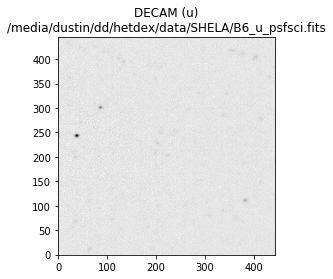

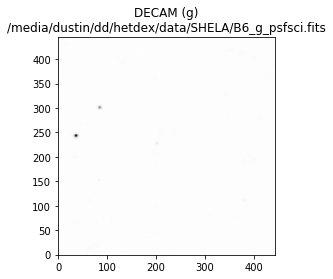

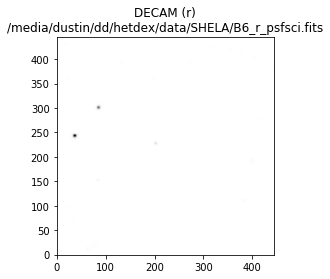

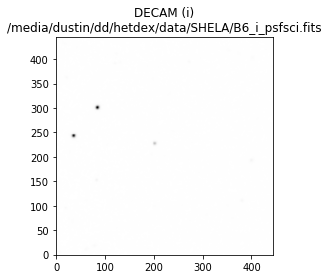

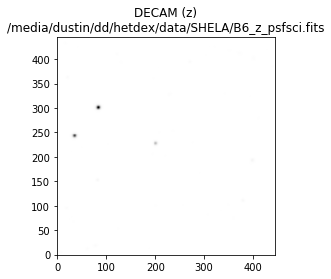

In [7]:
#exmaple of iterating through the cutouts with simple plots
for c in cutouts:
    plt.figure()
    plt.title("%s (%s)\n%s" %(c['instrument'],c['filter'],c['path']))
    plt.imshow(c['cutout'].data, origin="lower", cmap="gray_r")
    

In [8]:
# example of iterating through and writing out each as its own FITS 
# you can then open in ds9 and examine
import astropy.io.fits as fits

for i in range(len(cutouts)):
    co = cutouts[i]['cutout']
    hdu = fits.PrimaryHDU(co.data) #essentially empty header
    hdu.header.update(co.wcs.to_header()) #insert the cutout's WCS
    hdu.writeto('test_cutout_%d.fits' %i, overwrite=True)

# collect the catalog objects within the provided coordinate and radius


In [9]:
objs = catlib.get_catalog_objects(coord,10.)
#as with get_cutouts, you can also, optionally, pass in a list of catalogs to restrict the search
#objs = catlib.get_catalog_objects(coord,10./3600.,cats)

[16:05:32.576995]  Neither g-band nor r-band filter available.
[16:05:32.580158]  Neither g-band nor r-band filter available.
[16:05:32.584332]  Neither g-band nor r-band filter available.
[16:05:32.588423]  Neither g-band nor r-band filter available.
[16:05:32.591991]  Neither g-band nor r-band filter available.
[16:05:32.624323]  Neither g-band nor r-band filter available.
[16:05:32.627517]  Neither g-band nor r-band filter available.
[16:05:32.630812]  Neither g-band nor r-band filter available.
[16:05:32.634657]  Neither g-band nor r-band filter available.
[16:05:32.637707]  Neither g-band nor r-band filter available.
[16:05:32.645021]  Neither g-band nor r-band filter available.
[16:05:32.647867]  Neither g-band nor r-band filter available.
[16:05:32.650929]  Neither g-band nor r-band filter available.
[16:05:32.654746]  Neither g-band nor r-band filter available.
[16:05:32.659374]  Neither g-band nor r-band filter available.


What is returned is a list of dictionaries that include pandas dataframes from the overlapping catalogs. The dictionary contains:

'name' = the name of the catalog

'count' = the number of objects found within the radius

'dataframe' = the pandas data frame (the columns in the dataframe depend on the catalog, but will always contain 'RA','DEC', and 'distance' where distance is the angular distance from the target coordinate)


In [10]:
#find the number of objects
print(objs[0]['name'],objs[0]['count'])

#what columns are available
print(objs[0]['dataframe'].columns)

#here we iterate over the entries and print out some of the columns
for i,rec in objs[0]['dataframe'].iterrows():
    print(rec['RA'],rec['DEC'],rec['MAG_AUTO'],rec['distance'])

DECAM/SHELA 5
Index(['ID', 'RA', 'DEC', 'FLUX_AUTO', 'FLUXERR_AUTO', 'MAG_AUTO',
       'MAGERR_AUTO', 'TILE', 'FILTER', 'dist_prior', 'distance'],
      dtype='object')
24.00155299936976 0.0003750158568267407 20.449932098388672 0.0015976369848460577
24.000025683965443 -0.0014659875708134729 23.085824966430664 0.0014662125438900328
24.000958973837022 0.0020901544653650706 22.82297706604004 0.002299647040130061
24.001986589749336 -0.001224018438584489 22.76394271850586 0.0023334009450075195
23.99884899177453 0.002280218345668993 23.224363327026367 0.002554254419400212
